## Library

In [1]:
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K, M, B, T

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
print('Loaded 1')

exec(open('utils.py').read())
print('Loaded 2')

exec(open('modules/tai_timelines.py').read())
print('Loaded TAI timelines module')


Loaded 1
Loaded 2
Loaded TAI timelines module


## Variables

In [2]:
# Global variables - probably don't want to change these but you could.
RUNS = 10000                                      # Number of runs to do (default 10000)
CURRENT_YEAR = 2023                               # What year to start the run on? (default: 2023)
MAX_YEAR = 2123                                   # What year to end the run on? (default: 2123)
years = list(range(CURRENT_YEAR, MAX_YEAR))
VARIABLE_SETS = {}


VARIABLE_SETS['Cotra2020'] = {
    'initial_gdp': 23*T,                  # GDP in `CURRENT_YEAR` of country that will develop TAI (default: 23 trillion)
    'tai_flop_size': sq.sample(load_cache_file='caches/cotra_2020'),  # Cache generated in "Anchors" notebook
    # 90% CI, it takes 10^X FLOPs to run a transformative AI at inference.
    # Note: A petaflop/s-day (pfs-day) consists of performing 10^15 neural net operations per second for one day,
    # or a total of about 10^20 operations
    'algo_doubling_rate_max': 3.5,        # 90% CI, algorithms get twice as efficient every X years (maximum)
    'algo_doubling_rate_min': 2,          # 90% CI, algorithms get twice as efficient every X years (minimum)
    'min_reduction': 2,                   # 90% CI, the minimum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'max_reduction': 5,                   # 90% CI, the maximum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'initial_flops_per_dollar': 17.3,     # 90% CI, as of today, we can buy 10^X FLOPs per $ (originally 17 for 2020)
    'flops_halving_rate': 2.5,            # 90% CI, the cost of FLOPs per $ halves every X years
    'max_flops_per_dollar': 24,           # 90% CI, the cheapest FLOPs will get is 10^X FLOPs per $
    'initial_pay': 9,                     # 90% CI, as of today the maximum we would pay for TAI is $10^X (originally 8.7 for 2020)
    'gdp_growth': 1.03,                   # 90% CI, GDP will increase by a factor of X each year
    'max_gdp_frac': 0.01,                 # 90% CI, the maximum % of GDP that would be spent on TAI is $10^X
    'spend_doubling_time': 2.5            # 90% CI, our willingness to spend on TAI doubles every X years
}


VARIABLE_SETS['Cotra2022'] = deepcopy(VARIABLE_SETS['Cotra2020'])
VARIABLE_SETS['Cotra2022']['tai_flop_size'] = sq.sample(load_cache_file='caches/cotra_2022')  # Cache generated in "Anchors" notebook
VARIABLE_SETS['Cotra2022']['initial_flops_per_dollar'] = 18.3 # (originally 18 for 2020)
print('Loaded')

Loaded


## Run Cotra 2020

## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


100%|██████████████████████████████████████████████████████████| 10000/10000 [01:34<00:00, 105.35it/s]


Shuffling data...
Waiting for other cores...


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 2110.45it/s]


...Collected!
Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!
-
## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2027',
 '10%: 2030',
 '15%: 2033',
 '20%: 2036',
 '25%: 2039',
 '35%: 2045',
 '50%: 2052',
 '60%: 2064',
 '75%: 2090',
 '80%: >2123',
 '90%: >2123',
 '95%: >2123']
-
-
## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 4 years from now',
 '10%: 7 years from now',
 '15%: 10 years from now',
 '20%: 13 years from now',
 '25%: 16 years from now',
 '35%: 22 years from now',
 '50%: 29 years from now',
 '60%: 41 years from now',
 '75%: 67 years from now',
 '80%: >100 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
-
-
## TAI ARRIVAL DATE BY BIN ##
This year: 1.6%
2024-2027: 3.2%
2028-2029: 4.0%
2030-2034: 8.4%
2035-2039: 8.3%
2040-2049: 21.0%
2050-2059: 9.8%
2060-2069: 12.5%
2070-2079: 4.6%
2080-2089: 1.6%
2090-2099: 0.4%
2100-2109: 0.4%
2110-2119: 0.7%
>2120: 23.4%
-
## TAI ARRIVAL DATE BY YEAR - COMPARE TO BENCHMARK ##
By EOY 2024: 2

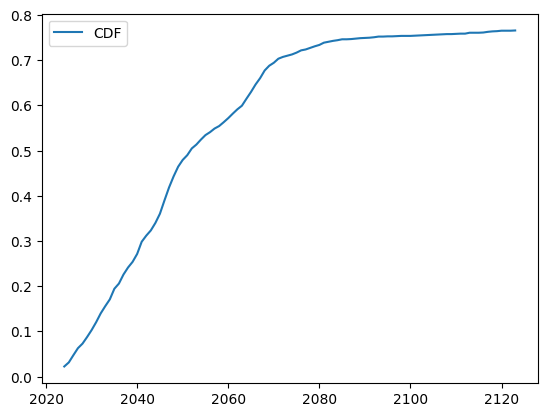

<string>:111: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<string>:112: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

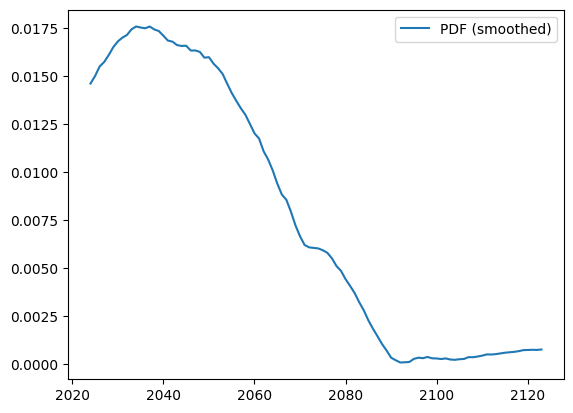

-
-
## TAI FLOP SIZE ##
{1: 26.0,
 5: 27.4,
 10: 28.4,
 20: 30.4,
 30: 32.2,
 40: 33.8,
 50: 35.3,
 60: 36.9,
 70: 38.8,
 80: 41.3,
 90: 45.6,
 95: 63.4,
 99: 68.2}


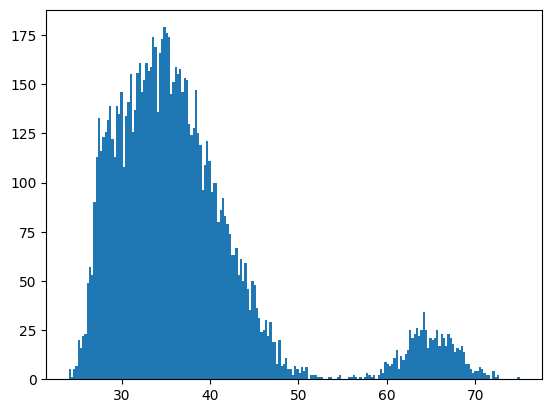

-
-
## MIN REDUCTION: 2 ##
-
## MAX REDUCTION: 5 ##
-
## MIN ALGO DOUBLING RATE: 2 ##
-
## MAX ALGO DOUBLING RATE: 3.5 ##
-
## INITIAL FLOPS PER DOLLAR: 17.3 ##
-
## FLOPS HALVING RATE: 2.5 ##
-
## MAX FLOPS PER DOLLAR: 24 ##
-
## INITIAL PAY: 9 ##
-
## GDP GROWTH: 1.03 ##
-
## MAX GDP FRAC: 0.01 ##
-
## SPEND DOUBLING TIME: 2.5 ##
-
-
-
## GDP Over Time ##


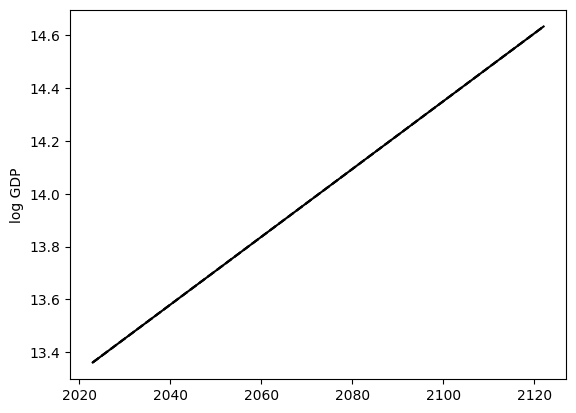

Year: 2023 - GDP log 2022$USD 13.4 (~23 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~23 trillion)
Year: 2024 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2025 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2026 - GDP log 2022$USD 13.4 (~25 trillion) 90% CI 13.4 (~25 trillion) - 13.4 (~25 trillion)
Year: 2027 - GDP log 2022$USD 13.4 (~26 trillion) 90% CI 13.4 (~26 trillion) - 13.4 (~26 trillion)
Year: 2028 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2029 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2030 - GDP log 2022$USD 13.5 (~28 trillion) 90% CI 13.5 (~28 trillion) - 13.5 (~28 trillion)
Year: 2031 - GDP log 2022$USD 13.5 (~29 trillion) 90% CI 13.5 (~29 trillion) - 13.5 (~29 trillion)
Year: 2032 - GDP log 2022$USD 13.5 (~30 trillion) 90% CI 13.5 (~30 trillion) - 13.5 (~30 trillion)
Year: 2033

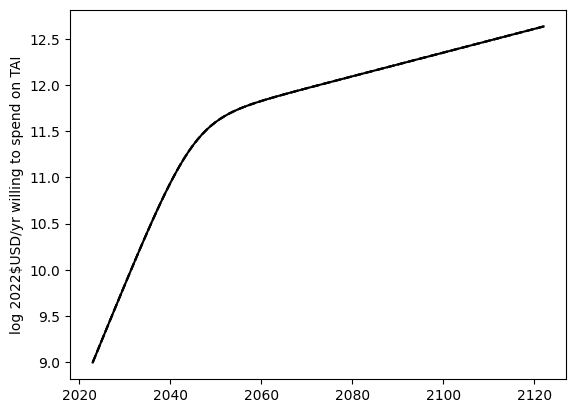

Year: 2023 - willingness log 2022$USD per year 9.0 (~996 million) 90% CI 9.0 (~996 million) - 9.0 (~996 million)
Year: 2024 - willingness log 2022$USD per year 9.1 (~1 billion) 90% CI 9.1 (~1 billion) - 9.1 (~1 billion)
Year: 2025 - willingness log 2022$USD per year 9.2 (~2 billion) 90% CI 9.2 (~2 billion) - 9.2 (~2 billion)
Year: 2026 - willingness log 2022$USD per year 9.4 (~2 billion) 90% CI 9.4 (~2 billion) - 9.4 (~2 billion)
Year: 2027 - willingness log 2022$USD per year 9.5 (~3 billion) 90% CI 9.5 (~3 billion) - 9.5 (~3 billion)
Year: 2028 - willingness log 2022$USD per year 9.6 (~4 billion) 90% CI 9.6 (~4 billion) - 9.6 (~4 billion)
Year: 2029 - willingness log 2022$USD per year 9.7 (~5 billion) 90% CI 9.7 (~5 billion) - 9.7 (~5 billion)
Year: 2030 - willingness log 2022$USD per year 9.8 (~7 billion) 90% CI 9.8 (~7 billion) - 9.8 (~7 billion)
Year: 2031 - willingness log 2022$USD per year 9.9 (~9 billion) 90% CI 9.9 (~9 billion) - 9.9 (~9 billion)
Year: 2032 - willingness log 20

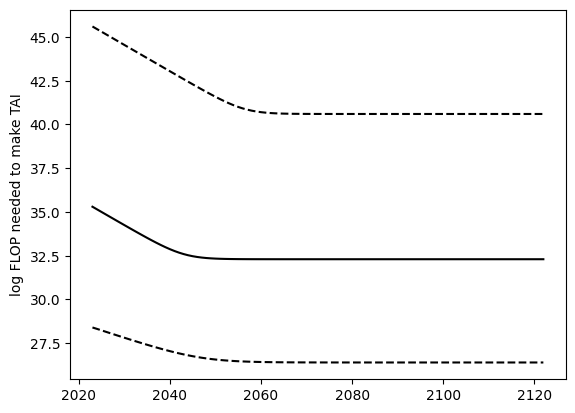

Year: 2023 - log FLOP needed for TAI 35.3 (~200 decillion) 90% CI 28.4 (~25 octillion) - 45.6 (~4 trillion decillion)
Year: 2024 - log FLOP needed for TAI 35.2 (~141 decillion) 90% CI 28.3 (~21 octillion) - 45.4 (~3 trillion decillion)
Year: 2025 - log FLOP needed for TAI 35.0 (~100 decillion) 90% CI 28.2 (~17 octillion) - 45.3 (~2 trillion decillion)
Year: 2026 - log FLOP needed for TAI 34.8 (~71 decillion) 90% CI 28.1 (~14 octillion) - 45.1 (~1 trillion decillion)
Year: 2027 - log FLOP needed for TAI 34.7 (~50 decillion) 90% CI 28.1 (~12 octillion) - 45.0 (~995 billion decillion)
Year: 2028 - log FLOP needed for TAI 34.5 (~35 decillion) 90% CI 28.0 (~10 octillion) - 44.8 (~704 billion decillion)
Year: 2029 - log FLOP needed for TAI 34.4 (~25 decillion) 90% CI 27.9 (~8 octillion) - 44.7 (~498 billion decillion)
Year: 2030 - log FLOP needed for TAI 34.3 (~18 decillion) 90% CI 27.8 (~7 octillion) - 44.5 (~352 billion decillion)
Year: 2031 - log FLOP needed for TAI 34.1 (~13 decillion) 9

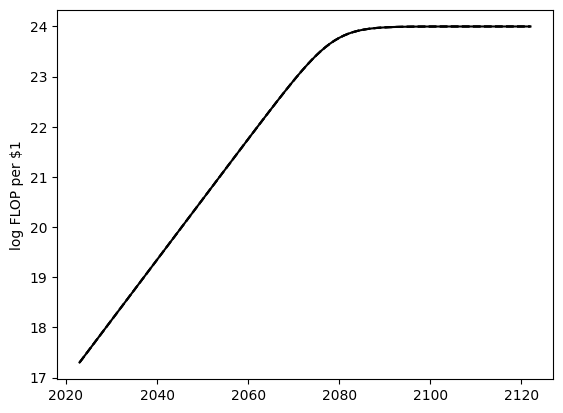

Year: 2023 - log FLOP per 2022$1USD 17.3 (~200 quadrillion) 90% CI 17.3 (~200 quadrillion) - 17.3 (~200 quadrillion)
Year: 2024 - log FLOP per 2022$1USD 17.4 (~263 quadrillion) 90% CI 17.4 (~263 quadrillion) - 17.4 (~263 quadrillion)
Year: 2025 - log FLOP per 2022$1USD 17.5 (~347 quadrillion) 90% CI 17.5 (~347 quadrillion) - 17.5 (~347 quadrillion)
Year: 2026 - log FLOP per 2022$1USD 17.7 (~458 quadrillion) 90% CI 17.7 (~458 quadrillion) - 17.7 (~458 quadrillion)
Year: 2027 - log FLOP per 2022$1USD 17.8 (~605 quadrillion) 90% CI 17.8 (~605 quadrillion) - 17.8 (~605 quadrillion)
Year: 2028 - log FLOP per 2022$1USD 17.9 (~798 quadrillion) 90% CI 17.9 (~798 quadrillion) - 17.9 (~798 quadrillion)
Year: 2029 - log FLOP per 2022$1USD 18.0 (~1 quintillion) 90% CI 18.0 (~1 quintillion) - 18.0 (~1 quintillion)
Year: 2030 - log FLOP per 2022$1USD 18.1 (~1 quintillion) 90% CI 18.1 (~1 quintillion) - 18.1 (~1 quintillion)
Year: 2031 - log FLOP per 2022$1USD 18.3 (~2 quintillion) 90% CI 18.3 (~2 qu

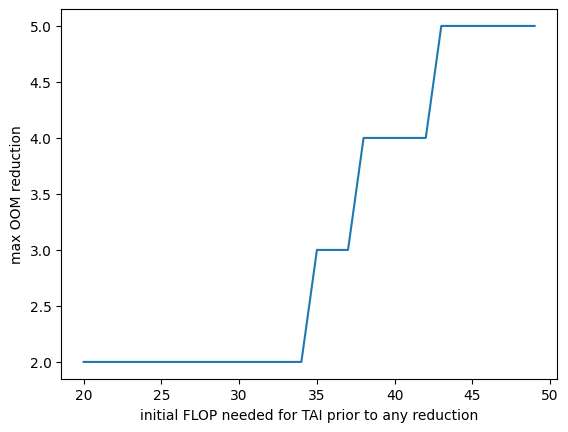

TAI log FLOP 20 -> 2.0 OOM reductions possible
TAI log FLOP 21 -> 2.0 OOM reductions possible
TAI log FLOP 22 -> 2.0 OOM reductions possible
TAI log FLOP 23 -> 2.0 OOM reductions possible
TAI log FLOP 24 -> 2.0 OOM reductions possible
TAI log FLOP 25 -> 2.0 OOM reductions possible
TAI log FLOP 26 -> 2.0 OOM reductions possible
TAI log FLOP 27 -> 2.0 OOM reductions possible
TAI log FLOP 28 -> 2.0 OOM reductions possible
TAI log FLOP 29 -> 2.0 OOM reductions possible
TAI log FLOP 30 -> 2.0 OOM reductions possible
TAI log FLOP 31 -> 2.0 OOM reductions possible
TAI log FLOP 32 -> 2.0 OOM reductions possible
TAI log FLOP 33 -> 2.0 OOM reductions possible
TAI log FLOP 34 -> 2.0 OOM reductions possible
TAI log FLOP 35 -> 3.0 OOM reductions possible
TAI log FLOP 36 -> 3.0 OOM reductions possible
TAI log FLOP 37 -> 3.0 OOM reductions possible
TAI log FLOP 38 -> 4.0 OOM reductions possible
TAI log FLOP 39 -> 4.0 OOM reductions possible
TAI log FLOP 40 -> 4.0 OOM reductions possible
TAI log FLOP 

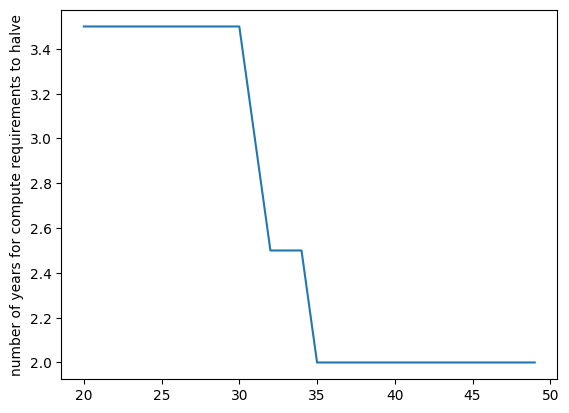

TAI log FLOP 20 -> algo doubling rate 3.5yrs
TAI log FLOP 21 -> algo doubling rate 3.5yrs
TAI log FLOP 22 -> algo doubling rate 3.5yrs
TAI log FLOP 23 -> algo doubling rate 3.5yrs
TAI log FLOP 24 -> algo doubling rate 3.5yrs
TAI log FLOP 25 -> algo doubling rate 3.5yrs
TAI log FLOP 26 -> algo doubling rate 3.5yrs
TAI log FLOP 27 -> algo doubling rate 3.5yrs
TAI log FLOP 28 -> algo doubling rate 3.5yrs
TAI log FLOP 29 -> algo doubling rate 3.5yrs
TAI log FLOP 30 -> algo doubling rate 3.5yrs
TAI log FLOP 31 -> algo doubling rate 3.0yrs
TAI log FLOP 32 -> algo doubling rate 2.5yrs
TAI log FLOP 33 -> algo doubling rate 2.5yrs
TAI log FLOP 34 -> algo doubling rate 2.5yrs
TAI log FLOP 35 -> algo doubling rate 2.0yrs
TAI log FLOP 36 -> algo doubling rate 2.0yrs
TAI log FLOP 37 -> algo doubling rate 2.0yrs
TAI log FLOP 38 -> algo doubling rate 2.0yrs
TAI log FLOP 39 -> algo doubling rate 2.0yrs
TAI log FLOP 40 -> algo doubling rate 2.0yrs
TAI log FLOP 41 -> algo doubling rate 2.0yrs
TAI log FL

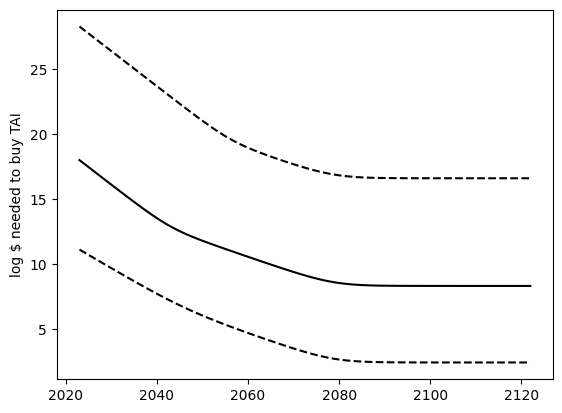

Year: 2023 - 18.0 log 2022$USD to buy TAI (~1 quintillion) 90% CI 11.1 (~126 billion) - 28.3 (~20 octillion)
Year: 2024 - 17.7 log 2022$USD to buy TAI (~537 quadrillion) 90% CI 10.9 (~79 billion) - 28.0 (~11 octillion)
Year: 2025 - 17.5 log 2022$USD to buy TAI (~288 quadrillion) 90% CI 10.7 (~49 billion) - 27.8 (~6 octillion)
Year: 2026 - 17.2 log 2022$USD to buy TAI (~154 quadrillion) 90% CI 10.5 (~31 billion) - 27.5 (~3 octillion)
Year: 2027 - 16.9 log 2022$USD to buy TAI (~83 quadrillion) 90% CI 10.3 (~19 billion) - 27.2 (~2 octillion)
Year: 2028 - 16.6 log 2022$USD to buy TAI (~44 quadrillion) 90% CI 10.1 (~12 billion) - 26.9 (~882 septillion)
Year: 2029 - 16.4 log 2022$USD to buy TAI (~24 quadrillion) 90% CI 9.9 (~8 billion) - 26.7 (~473 septillion)
Year: 2030 - 16.1 log 2022$USD to buy TAI (~13 quadrillion) 90% CI 9.7 (~5 billion) - 26.4 (~253 septillion)
Year: 2031 - 15.8 log 2022$USD to buy TAI (~7 quadrillion) 90% CI 9.5 (~3 billion) - 26.1 (~136 septillion)
Year: 2032 - 15.6 

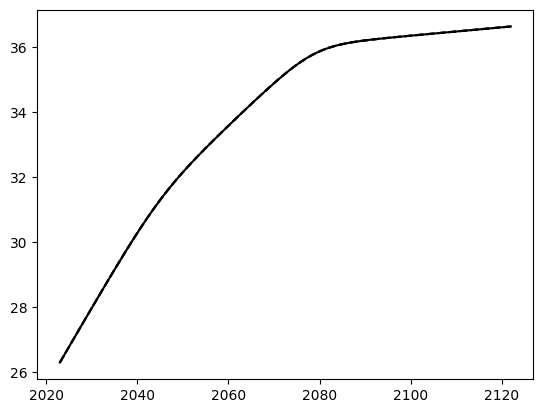

Year: 2023 - max log FLOP 26.3 (~199 septillion) 90% CI 26.3 (~199 septillion) - 26.3 (~199 septillion)
Year: 2024 - max log FLOP 26.5 (~345 septillion) 90% CI 26.5 (~345 septillion) - 26.5 (~345 septillion)
Year: 2025 - max log FLOP 26.8 (~601 septillion) 90% CI 26.8 (~601 septillion) - 26.8 (~601 septillion)
Year: 2026 - max log FLOP 27.0 (~1 octillion) 90% CI 27.0 (~1 octillion) - 27.0 (~1 octillion)
Year: 2027 - max log FLOP 27.3 (~2 octillion) 90% CI 27.3 (~2 octillion) - 27.3 (~2 octillion)
Year: 2028 - max log FLOP 27.5 (~3 octillion) 90% CI 27.5 (~3 octillion) - 27.5 (~3 octillion)
Year: 2029 - max log FLOP 27.7 (~5 octillion) 90% CI 27.7 (~5 octillion) - 27.7 (~5 octillion)
Year: 2030 - max log FLOP 28.0 (~9 octillion) 90% CI 28.0 (~9 octillion) - 28.0 (~9 octillion)
Year: 2031 - max log FLOP 28.2 (~16 octillion) 90% CI 28.2 (~16 octillion) - 28.2 (~16 octillion)
Year: 2032 - max log FLOP 28.5 (~28 octillion) 90% CI 28.5 (~28 octillion) - 28.5 (~28 octillion)
Year: 2033 - max 

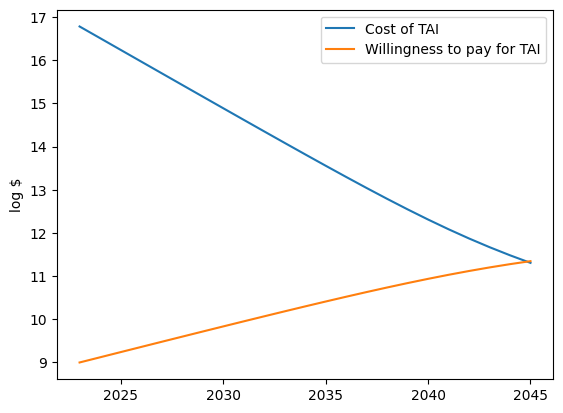

-
-
## SAMPLE RUN 2 ##
It takes 41.4 log FLOP (~244 million decillion) for transformative capabilities.
Every 2 years algorithms get 2x better, with 4 log reductions possible.
FLOP start at a cost of 17.3 log FLOP (~200 quadrillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are willing to pay 9.0 log 2022$USD (~1 billion) and this doubles every 2.5 years to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
If a non-scaling delay happens, it will take an additional 0 years to produce TAI due to issues unrelated to scaling FLOP
---
Year: 2023 - 26.3 max log FLOP (199 septillion) available - TAI takes 41.4 log FLOP (244 million decillion) - log $ 24.1 to buy TAI (1 septillion) vs. willingness to pay log $ 9.0 (996 million) - 17.3 log FLOPS per $ (200 quadrillion)
Year: 2024 - 26.5 max log FLOP (345 septillion) available - TAI takes 41.2 log FLOP (173 million decillion) - log $ 23.8 to buy TAI (656 sextilli

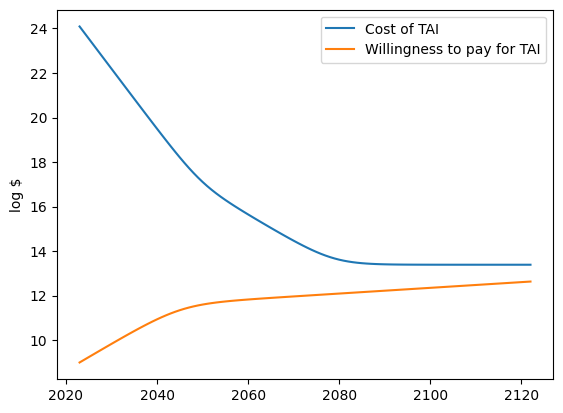

-
-
## SAMPLE RUN 3 ##
It takes 47.0 log FLOP (~95 trillion decillion) for transformative capabilities.
Every 2 years algorithms get 2x better, with 5 log reductions possible.
FLOP start at a cost of 17.3 log FLOP (~200 quadrillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are willing to pay 9.0 log 2022$USD (~1 billion) and this doubles every 2.5 years to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
If a non-scaling delay happens, it will take an additional 0 years to produce TAI due to issues unrelated to scaling FLOP
---
Year: 2023 - 26.3 max log FLOP (199 septillion) available - TAI takes 47.0 log FLOP (95 trillion decillion) - log $ 29.7 to buy TAI (478 octillion) vs. willingness to pay log $ 9.0 (996 million) - 17.3 log FLOPS per $ (200 quadrillion)
Year: 2024 - 26.5 max log FLOP (345 septillion) available - TAI takes 46.8 log FLOP (67 trillion decillion) - log $ 29.4 to buy TAI (256 octilli

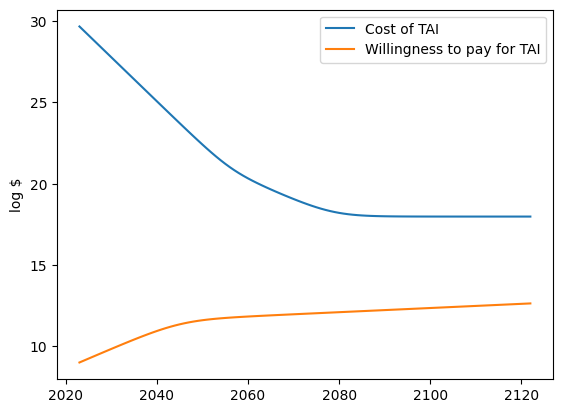

In [3]:
run_timelines_model(VARIABLE_SETS['Cotra2020'], cores=5, runs=RUNS)

## Run Cotra 2022

## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


100%|███████████████████████████████████████████████████████████| 10000/10000 [01:45<00:00, 95.21it/s]


Shuffling data...
Waiting for other cores...


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1626.58it/s]


...Collected!
Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!
-
## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2024',
 '10%: 2027',
 '15%: 2029',
 '20%: 2032',
 '25%: 2034',
 '35%: 2038',
 '50%: 2043',
 '60%: 2048',
 '75%: 2061',
 '80%: 2068',
 '90%: >2123',
 '95%: >2123']
-
-
## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 1 years from now',
 '10%: 4 years from now',
 '15%: 6 years from now',
 '20%: 9 years from now',
 '25%: 11 years from now',
 '35%: 15 years from now',
 '50%: 20 years from now',
 '60%: 25 years from now',
 '75%: 38 years from now',
 '80%: 45 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
-
-
## TAI ARRIVAL DATE BY BIN ##
This year: 4.7%
2024-2027: 4.8%
2028-2029: 5.7%
2030-2034: 10.3%
2035-2039: 12.7%
2040-2049: 24.2%
2050-2059: 10.5%
2060-2069: 7.9%
2070-2079: 2.1%
2080-2089: 0.3%
2090-2099: 0.5%
2100-2109: 0.5%
2110-2119: 0.5%
>2120: 15.3%
-
## TAI ARRIVAL DATE BY YEAR - COMPARE TO BENCHMARK ##
By EOY 2024: 5.6%

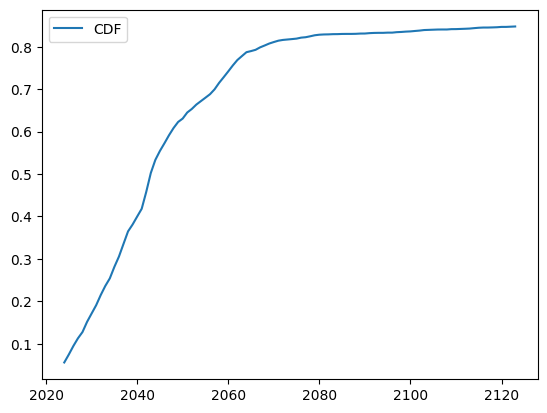

<string>:111: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<string>:112: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

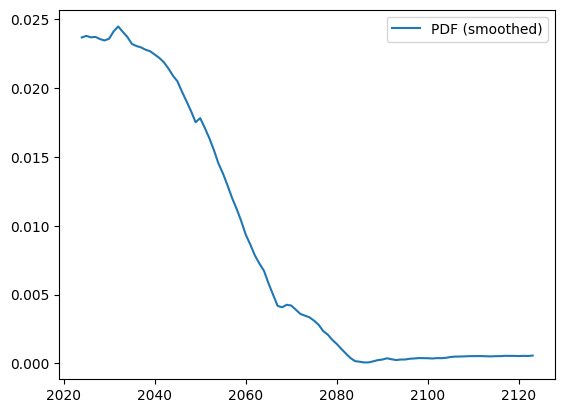

-
-
## TAI FLOP SIZE ##
{1: 26.0,
 5: 27.4,
 10: 28.3,
 20: 30.2,
 30: 31.8,
 40: 33.1,
 50: 34.5,
 60: 35.9,
 70: 37.4,
 80: 39.4,
 90: 42.2,
 95: 45.4,
 99: 66.2}


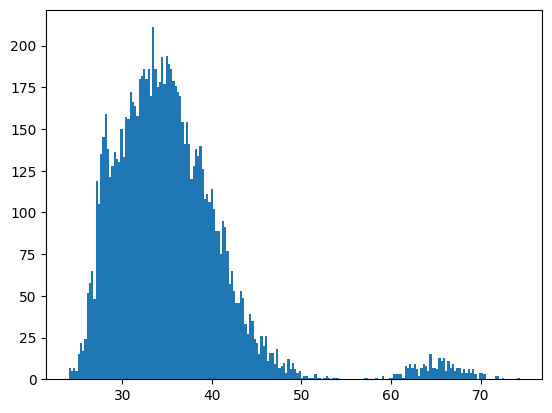

-
-
## MIN REDUCTION: 2 ##
-
## MAX REDUCTION: 5 ##
-
## MIN ALGO DOUBLING RATE: 2 ##
-
## MAX ALGO DOUBLING RATE: 3.5 ##
-
## INITIAL FLOPS PER DOLLAR: 18.3 ##
-
## FLOPS HALVING RATE: 2.5 ##
-
## MAX FLOPS PER DOLLAR: 24 ##
-
## INITIAL PAY: 9 ##
-
## GDP GROWTH: 1.03 ##
-
## MAX GDP FRAC: 0.01 ##
-
## SPEND DOUBLING TIME: 2.5 ##
-
-
-
## GDP Over Time ##


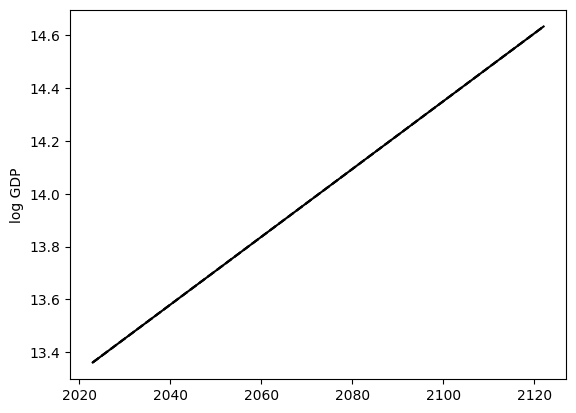

Year: 2023 - GDP log 2022$USD 13.4 (~23 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~23 trillion)
Year: 2024 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2025 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2026 - GDP log 2022$USD 13.4 (~25 trillion) 90% CI 13.4 (~25 trillion) - 13.4 (~25 trillion)
Year: 2027 - GDP log 2022$USD 13.4 (~26 trillion) 90% CI 13.4 (~26 trillion) - 13.4 (~26 trillion)
Year: 2028 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2029 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2030 - GDP log 2022$USD 13.5 (~28 trillion) 90% CI 13.5 (~28 trillion) - 13.5 (~28 trillion)
Year: 2031 - GDP log 2022$USD 13.5 (~29 trillion) 90% CI 13.5 (~29 trillion) - 13.5 (~29 trillion)
Year: 2032 - GDP log 2022$USD 13.5 (~30 trillion) 90% CI 13.5 (~30 trillion) - 13.5 (~30 trillion)
Year: 2033

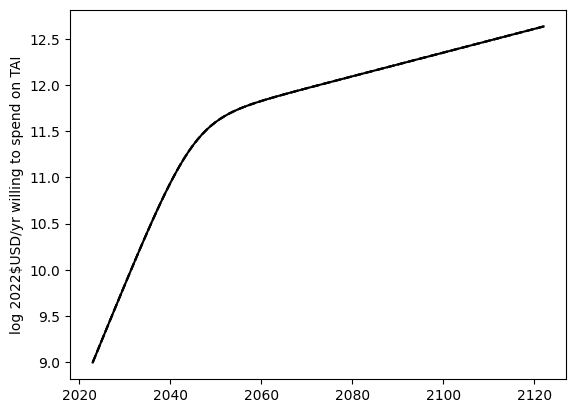

Year: 2023 - willingness log 2022$USD per year 9.0 (~996 million) 90% CI 9.0 (~996 million) - 9.0 (~996 million)
Year: 2024 - willingness log 2022$USD per year 9.1 (~1 billion) 90% CI 9.1 (~1 billion) - 9.1 (~1 billion)
Year: 2025 - willingness log 2022$USD per year 9.2 (~2 billion) 90% CI 9.2 (~2 billion) - 9.2 (~2 billion)
Year: 2026 - willingness log 2022$USD per year 9.4 (~2 billion) 90% CI 9.4 (~2 billion) - 9.4 (~2 billion)
Year: 2027 - willingness log 2022$USD per year 9.5 (~3 billion) 90% CI 9.5 (~3 billion) - 9.5 (~3 billion)
Year: 2028 - willingness log 2022$USD per year 9.6 (~4 billion) 90% CI 9.6 (~4 billion) - 9.6 (~4 billion)
Year: 2029 - willingness log 2022$USD per year 9.7 (~5 billion) 90% CI 9.7 (~5 billion) - 9.7 (~5 billion)
Year: 2030 - willingness log 2022$USD per year 9.8 (~7 billion) 90% CI 9.8 (~7 billion) - 9.8 (~7 billion)
Year: 2031 - willingness log 2022$USD per year 9.9 (~9 billion) 90% CI 9.9 (~9 billion) - 9.9 (~9 billion)
Year: 2032 - willingness log 20

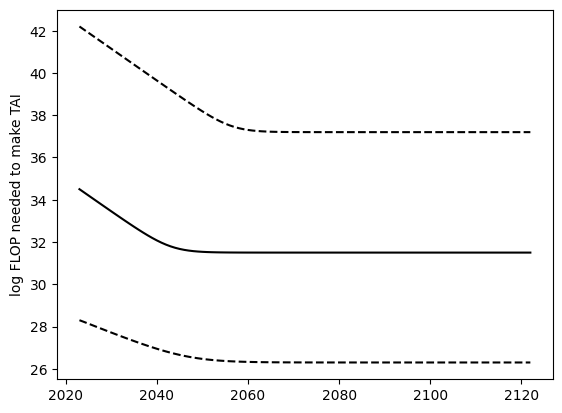

Year: 2023 - log FLOP needed for TAI 34.5 (~32 decillion) 90% CI 28.3 (~20 octillion) - 42.2 (~2 billion decillion)
Year: 2024 - log FLOP needed for TAI 34.4 (~22 decillion) 90% CI 28.2 (~17 octillion) - 42.0 (~1 billion decillion)
Year: 2025 - log FLOP needed for TAI 34.2 (~16 decillion) 90% CI 28.1 (~14 octillion) - 41.9 (~792 million decillion)
Year: 2026 - log FLOP needed for TAI 34.0 (~11 decillion) 90% CI 28.0 (~11 octillion) - 41.7 (~560 million decillion)
Year: 2027 - log FLOP needed for TAI 33.9 (~8 decillion) 90% CI 28.0 (~9 octillion) - 41.6 (~396 million decillion)
Year: 2028 - log FLOP needed for TAI 33.7 (~6 decillion) 90% CI 27.9 (~8 octillion) - 41.4 (~280 million decillion)
Year: 2029 - log FLOP needed for TAI 33.6 (~4 decillion) 90% CI 27.8 (~6 octillion) - 41.3 (~198 million decillion)
Year: 2030 - log FLOP needed for TAI 33.5 (~3 decillion) 90% CI 27.7 (~5 octillion) - 41.1 (~140 million decillion)
Year: 2031 - log FLOP needed for TAI 33.3 (~2 decillion) 90% CI 27.6

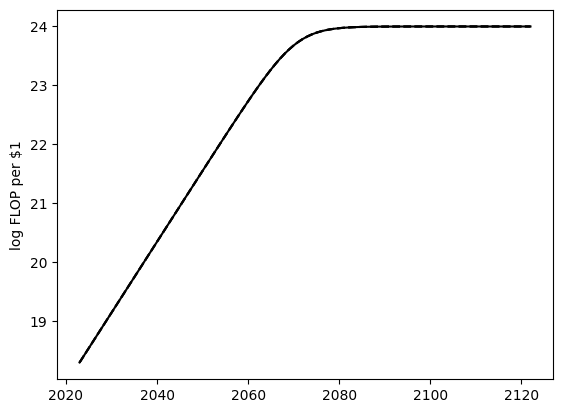

Year: 2023 - log FLOP per 2022$1USD 18.3 (~2 quintillion) 90% CI 18.3 (~2 quintillion) - 18.3 (~2 quintillion)
Year: 2024 - log FLOP per 2022$1USD 18.4 (~3 quintillion) 90% CI 18.4 (~3 quintillion) - 18.4 (~3 quintillion)
Year: 2025 - log FLOP per 2022$1USD 18.5 (~3 quintillion) 90% CI 18.5 (~3 quintillion) - 18.5 (~3 quintillion)
Year: 2026 - log FLOP per 2022$1USD 18.7 (~5 quintillion) 90% CI 18.7 (~5 quintillion) - 18.7 (~5 quintillion)
Year: 2027 - log FLOP per 2022$1USD 18.8 (~6 quintillion) 90% CI 18.8 (~6 quintillion) - 18.8 (~6 quintillion)
Year: 2028 - log FLOP per 2022$1USD 18.9 (~8 quintillion) 90% CI 18.9 (~8 quintillion) - 18.9 (~8 quintillion)
Year: 2029 - log FLOP per 2022$1USD 19.0 (~11 quintillion) 90% CI 19.0 (~11 quintillion) - 19.0 (~11 quintillion)
Year: 2030 - log FLOP per 2022$1USD 19.1 (~14 quintillion) 90% CI 19.1 (~14 quintillion) - 19.1 (~14 quintillion)
Year: 2031 - log FLOP per 2022$1USD 19.3 (~18 quintillion) 90% CI 19.3 (~18 quintillion) - 19.3 (~18 quint

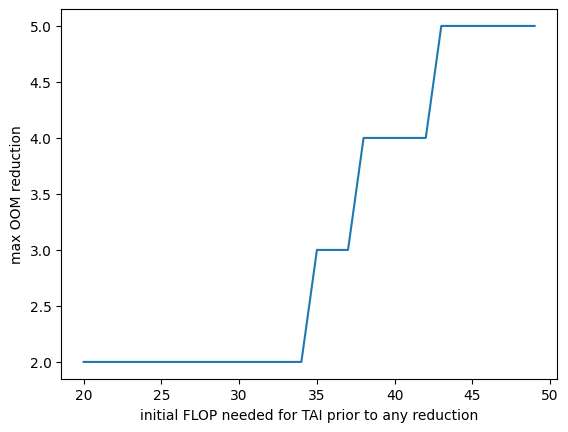

TAI log FLOP 20 -> 2.0 OOM reductions possible
TAI log FLOP 21 -> 2.0 OOM reductions possible
TAI log FLOP 22 -> 2.0 OOM reductions possible
TAI log FLOP 23 -> 2.0 OOM reductions possible
TAI log FLOP 24 -> 2.0 OOM reductions possible
TAI log FLOP 25 -> 2.0 OOM reductions possible
TAI log FLOP 26 -> 2.0 OOM reductions possible
TAI log FLOP 27 -> 2.0 OOM reductions possible
TAI log FLOP 28 -> 2.0 OOM reductions possible
TAI log FLOP 29 -> 2.0 OOM reductions possible
TAI log FLOP 30 -> 2.0 OOM reductions possible
TAI log FLOP 31 -> 2.0 OOM reductions possible
TAI log FLOP 32 -> 2.0 OOM reductions possible
TAI log FLOP 33 -> 2.0 OOM reductions possible
TAI log FLOP 34 -> 2.0 OOM reductions possible
TAI log FLOP 35 -> 3.0 OOM reductions possible
TAI log FLOP 36 -> 3.0 OOM reductions possible
TAI log FLOP 37 -> 3.0 OOM reductions possible
TAI log FLOP 38 -> 4.0 OOM reductions possible
TAI log FLOP 39 -> 4.0 OOM reductions possible
TAI log FLOP 40 -> 4.0 OOM reductions possible
TAI log FLOP 

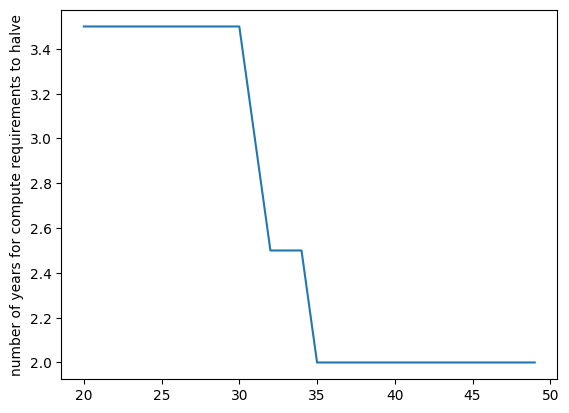

TAI log FLOP 20 -> algo doubling rate 3.5yrs
TAI log FLOP 21 -> algo doubling rate 3.5yrs
TAI log FLOP 22 -> algo doubling rate 3.5yrs
TAI log FLOP 23 -> algo doubling rate 3.5yrs
TAI log FLOP 24 -> algo doubling rate 3.5yrs
TAI log FLOP 25 -> algo doubling rate 3.5yrs
TAI log FLOP 26 -> algo doubling rate 3.5yrs
TAI log FLOP 27 -> algo doubling rate 3.5yrs
TAI log FLOP 28 -> algo doubling rate 3.5yrs
TAI log FLOP 29 -> algo doubling rate 3.5yrs
TAI log FLOP 30 -> algo doubling rate 3.5yrs
TAI log FLOP 31 -> algo doubling rate 3.0yrs
TAI log FLOP 32 -> algo doubling rate 2.5yrs
TAI log FLOP 33 -> algo doubling rate 2.5yrs
TAI log FLOP 34 -> algo doubling rate 2.5yrs
TAI log FLOP 35 -> algo doubling rate 2.0yrs
TAI log FLOP 36 -> algo doubling rate 2.0yrs
TAI log FLOP 37 -> algo doubling rate 2.0yrs
TAI log FLOP 38 -> algo doubling rate 2.0yrs
TAI log FLOP 39 -> algo doubling rate 2.0yrs
TAI log FLOP 40 -> algo doubling rate 2.0yrs
TAI log FLOP 41 -> algo doubling rate 2.0yrs
TAI log FL

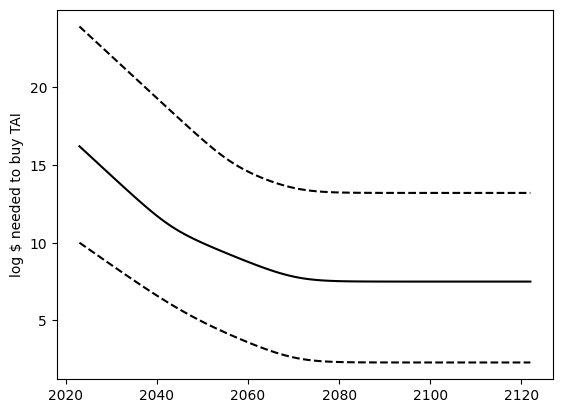

Year: 2023 - 16.2 log 2022$USD to buy TAI (~16 quadrillion) 90% CI 10.0 (~10 billion) - 23.9 (~794 sextillion)
Year: 2024 - 15.9 log 2022$USD to buy TAI (~9 quadrillion) 90% CI 9.8 (~6 billion) - 23.6 (~426 sextillion)
Year: 2025 - 15.7 log 2022$USD to buy TAI (~5 quadrillion) 90% CI 9.6 (~4 billion) - 23.4 (~228 sextillion)
Year: 2026 - 15.4 log 2022$USD to buy TAI (~2 quadrillion) 90% CI 9.4 (~2 billion) - 23.1 (~122 sextillion)
Year: 2027 - 15.1 log 2022$USD to buy TAI (~1 quadrillion) 90% CI 9.2 (~2 billion) - 22.8 (~66 sextillion)
Year: 2028 - 14.8 log 2022$USD to buy TAI (~704 trillion) 90% CI 9.0 (~954 million) - 22.5 (~35 sextillion)
Year: 2029 - 14.6 log 2022$USD to buy TAI (~378 trillion) 90% CI 8.8 (~596 million) - 22.3 (~19 sextillion)
Year: 2030 - 14.3 log 2022$USD to buy TAI (~203 trillion) 90% CI 8.6 (~373 million) - 22.0 (~10 sextillion)
Year: 2031 - 14.0 log 2022$USD to buy TAI (~110 trillion) 90% CI 8.4 (~234 million) - 21.7 (~5 sextillion)
Year: 2032 - 13.8 log 2022$

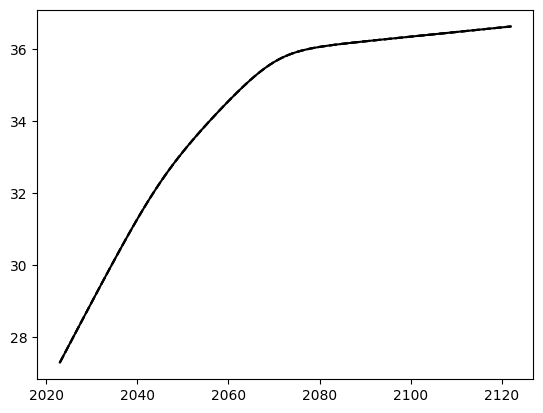

Year: 2023 - max log FLOP 27.3 (~2 octillion) 90% CI 27.3 (~2 octillion) - 27.3 (~2 octillion)
Year: 2024 - max log FLOP 27.5 (~3 octillion) 90% CI 27.5 (~3 octillion) - 27.5 (~3 octillion)
Year: 2025 - max log FLOP 27.8 (~6 octillion) 90% CI 27.8 (~6 octillion) - 27.8 (~6 octillion)
Year: 2026 - max log FLOP 28.0 (~10 octillion) 90% CI 28.0 (~10 octillion) - 28.0 (~10 octillion)
Year: 2027 - max log FLOP 28.3 (~18 octillion) 90% CI 28.3 (~18 octillion) - 28.3 (~18 octillion)
Year: 2028 - max log FLOP 28.5 (~31 octillion) 90% CI 28.5 (~31 octillion) - 28.5 (~31 octillion)
Year: 2029 - max log FLOP 28.7 (~55 octillion) 90% CI 28.7 (~55 octillion) - 28.7 (~55 octillion)
Year: 2030 - max log FLOP 29.0 (~94 octillion) 90% CI 29.0 (~94 octillion) - 29.0 (~94 octillion)
Year: 2031 - max log FLOP 29.2 (~163 octillion) 90% CI 29.2 (~163 octillion) - 29.2 (~163 octillion)
Year: 2032 - max log FLOP 29.5 (~282 octillion) 90% CI 29.5 (~282 octillion) - 29.5 (~282 octillion)
Year: 2033 - max log FL

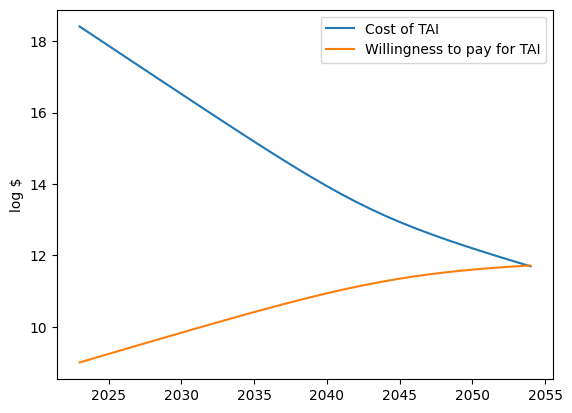

-
-
## SAMPLE RUN 2 ##
It takes 33.9 log FLOP (~7 decillion) for transformative capabilities.
Every 2.5 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are willing to pay 9.0 log 2022$USD (~1 billion) and this doubles every 2.5 years to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
If a non-scaling delay happens, it will take an additional 0 years to produce TAI due to issues unrelated to scaling FLOP
---
Year: 2023 - 27.3 max log FLOP (2 octillion) available - TAI takes 33.9 log FLOP (7 decillion) - log $ 15.6 to buy TAI (4 quadrillion) vs. willingness to pay log $ 9.0 (996 million) - 18.3 log FLOPS per $ (2 quintillion)
Year: 2024 - 27.5 max log FLOP (3 octillion) available - TAI takes 33.7 log FLOP (6 decillion) - log $ 15.3 to buy TAI (2 quadrillion) vs. willingness to pay log $ 9.1 (

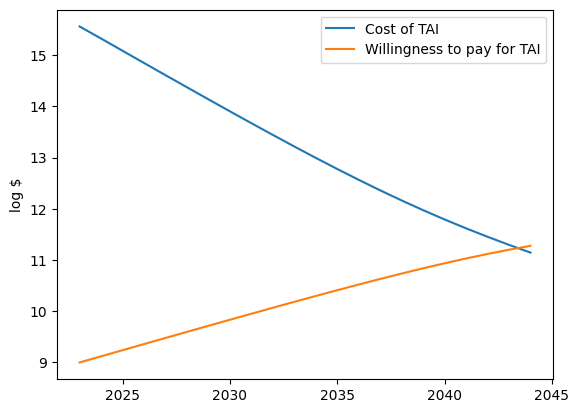

-
-
## SAMPLE RUN 3 ##
It takes 40.5 log FLOP (~32 million decillion) for transformative capabilities.
Every 2 years algorithms get 2x better, with 4 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are willing to pay 9.0 log 2022$USD (~1 billion) and this doubles every 2.5 years to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
If a non-scaling delay happens, it will take an additional 0 years to produce TAI due to issues unrelated to scaling FLOP
---
Year: 2023 - 27.3 max log FLOP (2 octillion) available - TAI takes 40.5 log FLOP (32 million decillion) - log $ 22.2 to buy TAI (16 sextillion) vs. willingness to pay log $ 9.0 (996 million) - 18.3 log FLOPS per $ (2 quintillion)
Year: 2024 - 27.5 max log FLOP (3 octillion) available - TAI takes 40.4 log FLOP (23 million decillion) - log $ 21.9 to buy TAI (9 sextillion) vs. willin

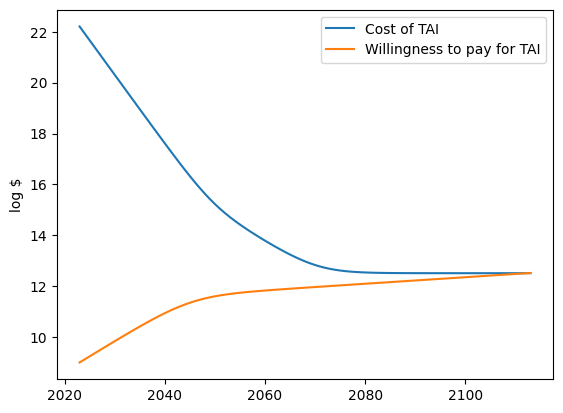

In [4]:
run_timelines_model(VARIABLE_SETS['Cotra2022'], cores=5, runs=RUNS)